In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


실습예제1: Pclass에 대한 생존확률 차트보기

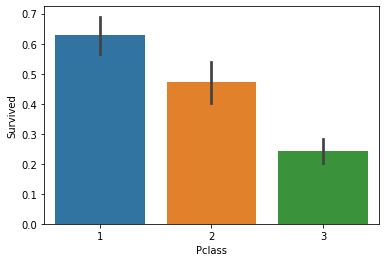

In [3]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df)

실습예제2: Embarked에 대한 생존자 예측(embarked:탑승장소를 의미, S=Southhampton, C=Cherbourg, Q=Queenstown)

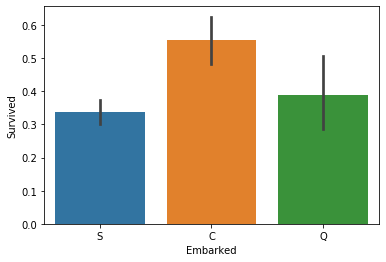

In [6]:
sns.barplot(x='Embarked', y='Survived', data=titanic_df)

실습예제3: 객실등급별 탑승장소에 따른 생존확률 찾아보기

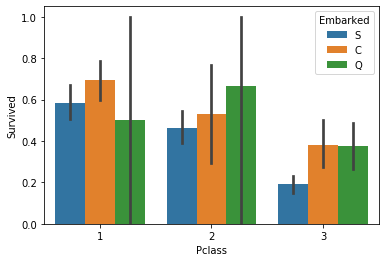

In [7]:
sns.barplot(x='Pclass', y='Survived', hue='Embarked', data=titanic_df)

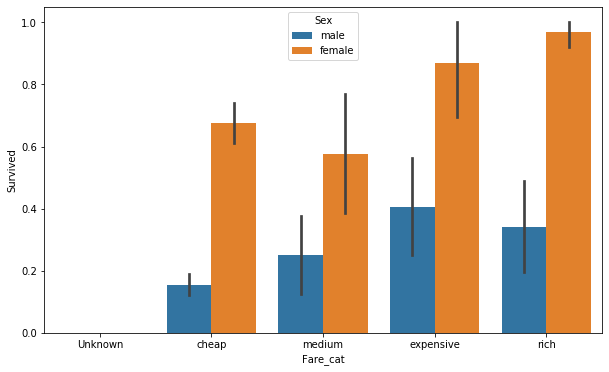

In [12]:
def get_category(fare):
    cat = ''
    if fare <=-1: cat = 'Unknown'
    elif fare <=30: cat = 'cheap'
    elif fare <= 50: cat = 'medium'
    elif fare <= 70: cat = 'expensive'
    else: cat = 'rich'
        
    return cat

plt.figure(figsize=(10,6))

group_names = ['Unknown', 'cheap', 'medium', 'expensive', 'rich']

titanic_df['Fare_cat'] = titanic_df['Fare'].apply(lambda x:get_category(x))
sns.barplot(x='Fare_cat', y='Survived', hue = 'Sex', data = titanic_df, order = group_names)
titanic_df.drop('Fare_cat', axis=1, inplace=True)